In [1]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

# Faber - Jackson relation
def luminosity_function(sigma):
    a = 2.0 #slope for V-band (for now)
    b = 5.8 #intercept for V-band (for now)
    L = 10**(a*np.log10(sigma) + b)
    return L #in solar luminosities

M_solar = 4.74 #Absolute magnitude of the Sun

def absolute_magnitude(L):
    M = M_solar - 2.5*np.log10(L)
    return M

def apparent_magnitude(M, z, k):
    m = M + cosmo.distmod(z).value + k
    return(m)

def angular_diameter(sigma, z, m, k):
    #[effective_radius] = kpc, [vel_dispersion]=km/s, []
    a = 1.4043 #orthogonal fit for g band
    b = 0.3045 #orthogonal fit for g band
    c = -8.8579 #orthogonal fit for g band
    delta_a = 0.02 #uncertainty due to random errors
    delta_b = 0.01 #uncertainty due to random errors
    D = cosmo.angular_diameter_distance(z).to(u.kpc).value
    first = (60*60*180*sigma**a)/(D*np.pi)
    second = (2*np.pi)**(2.5*b)/(1+z)**(10*b)
    third = 10**(b*m - b*k + c)
    re =  (first*second*third)**(1/(1-5*b))
    # Scattering
    #mu_e = -2.5*np.log10(L/(2*np.pi*Re**2))
    #sig_scatter = (np.abs(np.log10(sigma))*delta_a**2 +
                   #np.abs(mu_e)*delta_b**2)**0.5
    #scatter = np.random.randn()*sig_scatter
    scatter = 0
    return(re + scatter)

In [3]:
# https://iopscience.iop.org/article/10.1086/589327/pdf (Table 4)
# Galaxy with Plate-MJD-Fiber ID: 1387-53118-532
z = 0.3583
sigma = 264
k = 0
L_table = 204*10**9
re_table = 2.90
L = luminosity_function(sigma)
M = absolute_magnitude(L)
m = apparent_magnitude(M, z, k)
re = angular_diameter(sigma, z, m, k)
print("Luminosity in solar units: %.2e"%(L))
print("Table luminosity in solar units: %.2e"%(L_table))
print("Absolute Magnitude: %.2e"%(M))
print("Apparent magnitude:" +str(m))
print("Angular diameter (angular size) in arc seconds: " + str(re))
print("Table angular diameter (angular size) in arc seconds: " + str(re_table))

Luminosity in solar units: 4.40e+10
Table luminosity in solar units: 2.04e+11
Absolute Magnitude: -2.19e+01
Apparent magnitude:19.535405258235734
Angular diameter (angular size) in arc seconds: 1.0283182077255244
Table angular diameter (angular size) in arc seconds: 2.9


In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('data.csv',delimiter='\t',encoding='utf-8')
data

,SDSS,Plate,MJD,Fiber,zFG,zBG,Imag,n_Imag,AI,Name,...,PA,sigma,e_sigma,Mph,Mul,Lens,n_Lens,Sloan,_RA,_DE
0,000802.96-000408.2,669,52559,156,0.4400,1.1924,18.65,d,0.12,J0008-0004,...,27.3,,,E,S,A,,Sloan,2.01233,-0.06894
1,002817.87-092934.3,653,52145,590,0.0565,0.7146,13.75,s,0.07,J0028-0929,...,78.9,147,7,L,S,X,,Sloan,7.07446,-9.49286
2,002907.77-005550.5,391,51782,88,0.2270,0.9313,17.09,d,0.04,J0029-0055,...,26.6,229,18,E,S,A,,Sloan,7.28237,-0.93069
3,003753.21-094220.1,655,52162,392,0.1955,0.6322,16.26,s,0.06,J0037-0942,...,11.4,279,14,E,S,A,,Sloan,9.47171,-9.70558
4,004402.90+011312.6,393,51794,456,0.1196,0.1965,15.73,s,0.04,J0044+0113,...,151.3,266,13,E,S,A,,Sloan,11.01208,1.22017
5,010933.73+150032.5,422,51811,508,0.2939,0.5248,17.75,s,0.11,J0109+1500,...,104,251,19,E,S,A,,Sloan,17.39054,15.00903
6,015758.94-005626.1,700,52199,20,0.5132,0.9243,18.64,d,0.05,J0157-0056,...,69.2,,,E,S,A,,Sloan,29.49558,-0.94058
7,021652.54-081345.3,668,52162,428,0.3317,0.5235,16.93,d,0.07,J0216-0813,...,81.2,333,23,E,S,A,,Sloan,34.21892,-8.22925
8,025245.21+003958.4,807,52295,614,0.2803,0.9818,18.04,d,0.15,J0252+0039,...,97.2,164,12,E,S,A,,Sloan,43.18837,0.66622
9,033012.14-002051.9,810,52672,252,0.3507,1.0709,18.16,d,0.16,J0330-0020,...,109.6,212,21,E,S,A,,Sloan,52.55058,-0.34775


In [6]:
new_data = []
L_histogram  = []
re_histogram = []
for index, row in data.iterrows():
    z = float(row['zFG'])
    sigma = row['sigma']
    k = 0 #I have to calculate this k-correction
    L_table  = row['L(V555)'] #Rest frame luminosity in V555 band
    re_table = row['Re']
    if(sigma!='   ' and L_table!='   ' and re_table!='   '):
        sigma = float(sigma)
        L_table  = float(L_table)*10**9 # Total luminosity
        re_table = float(re_table)
        L = luminosity_function(sigma)
        M = absolute_magnitude(L)
        m = apparent_magnitude(M, z, k)
        re = angular_diameter(sigma, z, m, k)
        new_data.append([z, sigma, L_table, L, m, re_table, re])
        L_histogram.append(L/L_table)
        re_histogram.append(re/re_table)
new_data = pd.DataFrame(new_data, columns = ['z', 'Sigma (km/s)',
                        'L table (Lo)', 'L (Lo)', 'm (mag.s)', 
                        're Table (arcs)', 're (arcs)'])

In [7]:
new_data.head

<bound method NDFrame.head of           z  Sigma (km/s)  L table (Lo)        L (LO)  m (mag.s)  \
0    0.0565         147.0  9.280000e+10  1.363436e+10  16.413504   
1    0.2270         229.0  7.630000e+10  3.308803e+10  18.705662   
2    0.1955         279.0  1.205000e+11  4.911435e+10  17.913082   
3    0.1196         266.0  6.880000e+10  4.464402e+10  16.847579   
4    0.2939         251.0  7.720000e+10  3.975094e+10  19.145621   
5    0.3317         333.0  2.064000e+11  6.996623e+10  18.835803   
6    0.2803         164.0  5.580000e+10  1.697023e+10  19.951526   
7    0.3507         212.0  8.230000e+10  2.835775e+10  19.957316   
8    0.1301         160.0  7.690000e+10  1.615251e+10  18.148881   
9    0.0753         160.0  1.580000e+10  1.615251e+10  16.881960   
10   0.2058         214.0  9.120000e+10  2.889532e+10  18.613575   
11   0.3223         338.0  1.778000e+11  7.208309e+10  18.730930   
12   0.0853         165.0  1.100000e+10  1.717781e+10  17.100884   
13   0.1156       

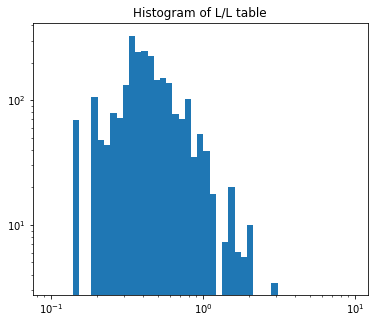

In [16]:
bins = np.logspace(-1, 1, 50)
widths = (bins[1:] - bins[:-1])

hist = np.histogram(L_histogram, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths


plt.figure(figsize=(6,5))
plt.title('Histogram of L/L table')
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')
plt.show()

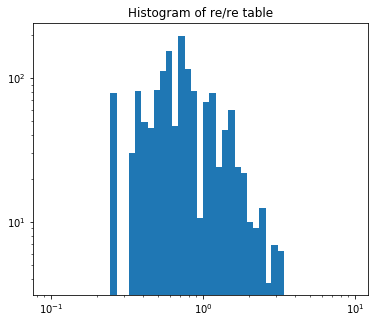

In [17]:
bins = np.logspace(-1, 1, 50)
widths = (bins[1:] - bins[:-1])

hist = np.histogram(re_histogram, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

plt.figure(figsize=(6,5))
plt.title('Histogram of re/re table')
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [10]:
z_plot = []
sigma_plot = []
L_plot  = []
for index, row in data.iterrows():
    z = float(row['zFG'])
    sigma = row['sigma']
    k = 0 #I have to calculate this k-correction
    L_table  = row['L(V555)'] #Rest frame luminosity in V555 band
    re_table = row['Re']
    if(sigma!='   ' and L_table!='   ' and re_table!='   '):
        sigma = float(sigma)
        L_table  = float(L_table)*10**9 # Total luminosity
        re_table = float(re_table)
        L = luminosity_function(sigma)
        M = absolute_magnitude(L)
        m = apparent_magnitude(M, z, k)
        re = angular_diameter(sigma, z, m, k)
        z_plot.append(z)
        sigma_plot.append(sigma)
        L_plot.append(L/L_table)

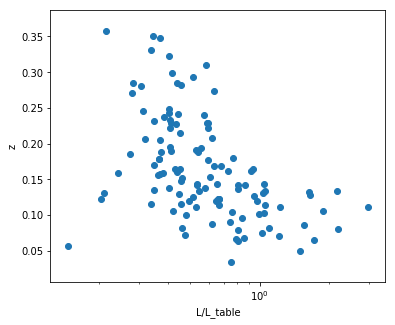

In [18]:
plt.figure(figsize=(6,5))
plt.xlabel("L/L_table")
plt.ylabel("z")
plt.xscale('log')
plt.scatter(L_plot,z_plot)

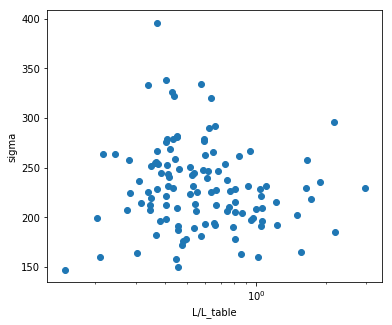

In [19]:
plt.figure(figsize=(6,5))
plt.xlabel("L/L_table")
plt.ylabel("sigma")
plt.xscale('log')
plt.scatter(L_plot,sigma_plot)